# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB

# **Load and Check Data**

In [ ]:
path =r'X:\ML\Projects\Breast Cancer\Dataset\breast-cancer.csv'
data = pd.read_csv(path)

In [3]:
df = data.copy()

In [4]:
df.shape

(569, 32)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


# **EDA and Visualization**

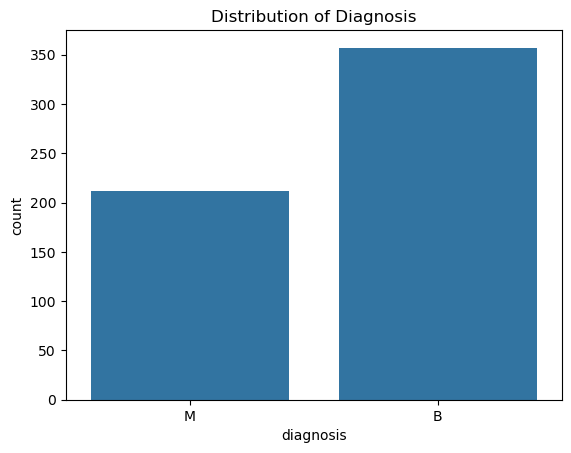

In [10]:
sns.countplot(x = "diagnosis" , data = df)
plt.title("Distribution of Diagnosis")
plt.show()

In [11]:
print(data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [12]:
df['diagnosis'] = df['diagnosis'].map({ 'M':0, 'B':1 })

<function matplotlib.pyplot.show(close=None, block=None)>

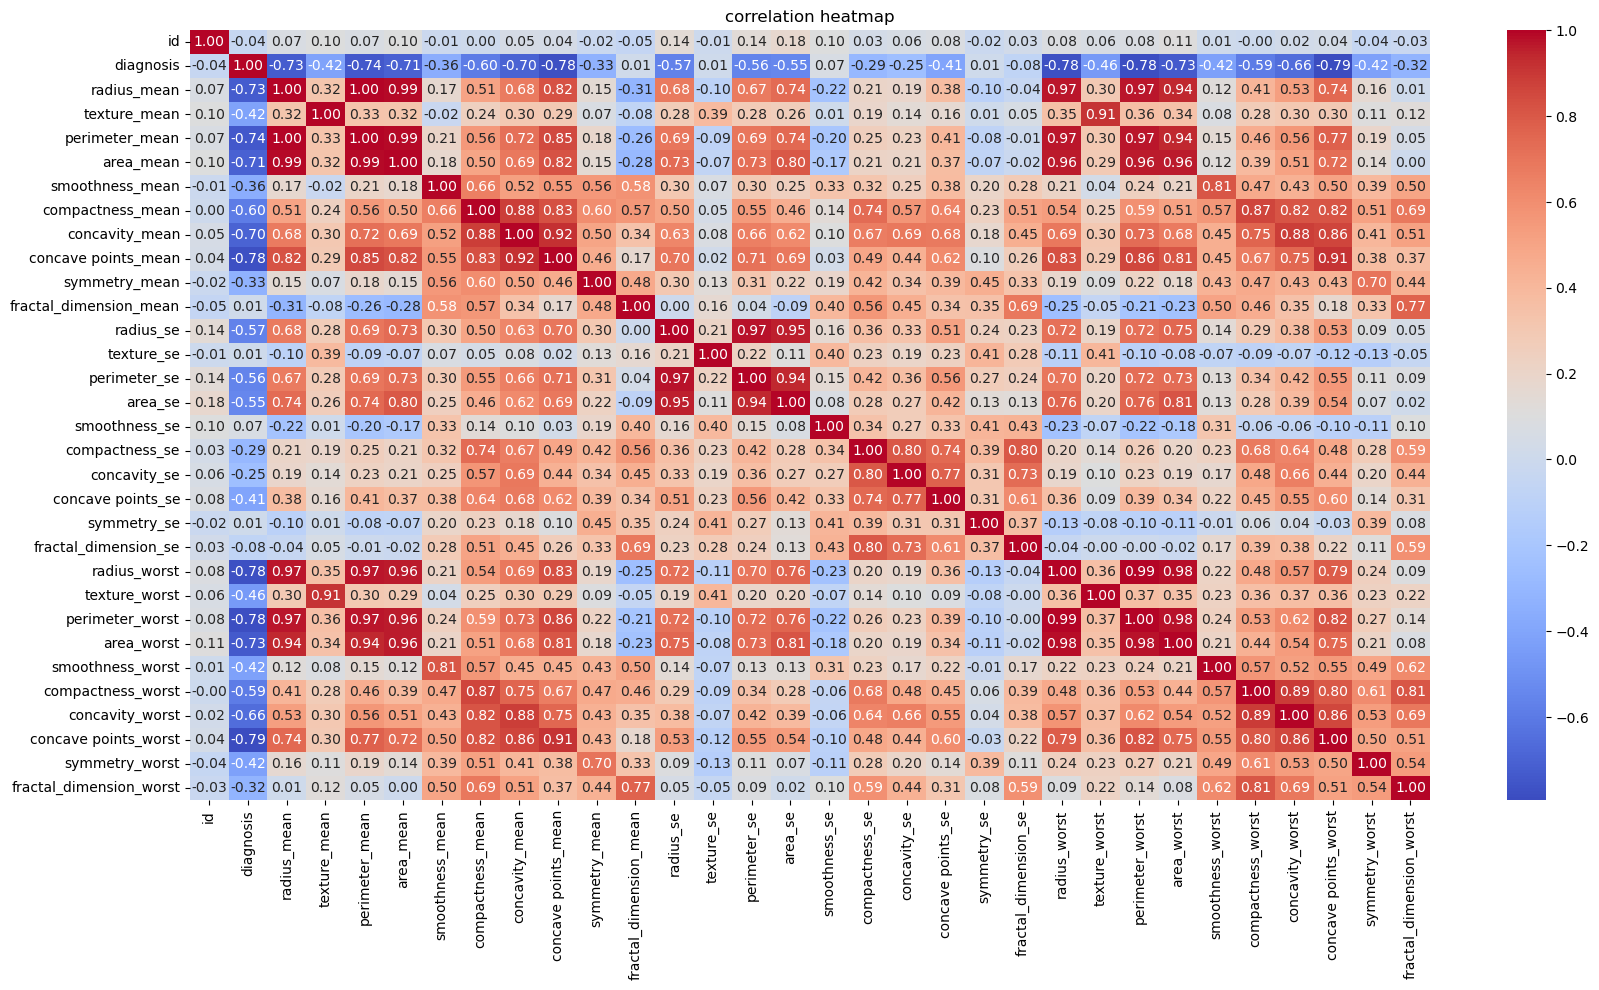

In [13]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.2f')
plt.title("correlation heatmap")
plt.show

In [14]:
columns = ['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se','concavity_se','symmetry_mean','smoothness_mean','fractal_dimension_worst','compactness_se']
for col in columns:
    corr = df[col].corr(df['diagnosis'])
    print(f"{col} to diagnosis: {corr:.4f}")

fractal_dimension_mean to diagnosis: 0.0128
texture_se to diagnosis: 0.0083
smoothness_se to diagnosis: 0.0670
symmetry_se to diagnosis: 0.0065
fractal_dimension_se to diagnosis: -0.0780
concavity_se to diagnosis: -0.2537
symmetry_mean to diagnosis: -0.3305
smoothness_mean to diagnosis: -0.3586
fractal_dimension_worst to diagnosis: -0.3239
compactness_se to diagnosis: -0.2930


In [15]:
Avg_groupby = df.groupby('diagnosis').mean(numeric_only=True)
display(Avg_groupby)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [16]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop('diagnosis')

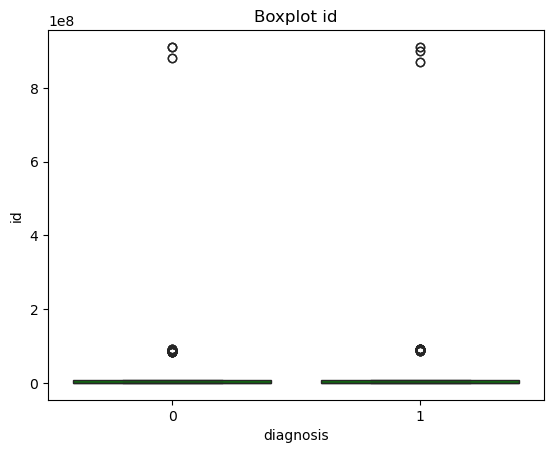

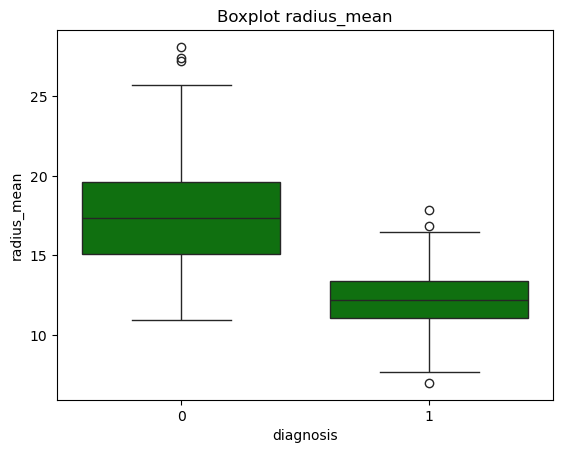

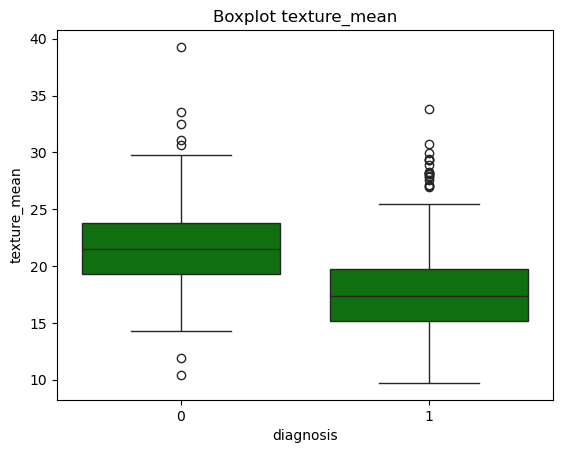

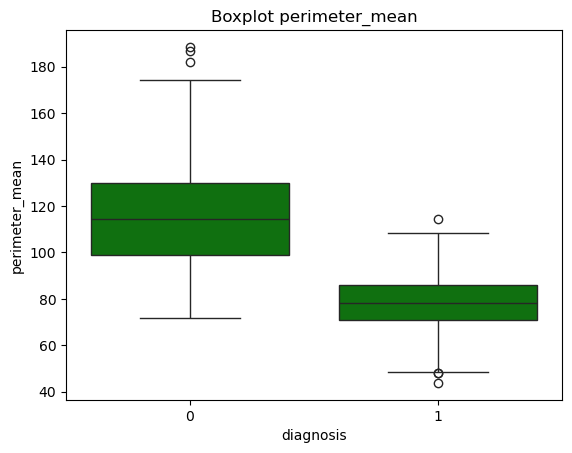

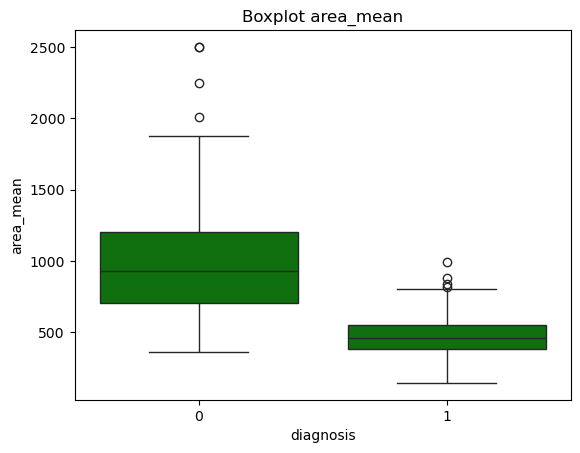

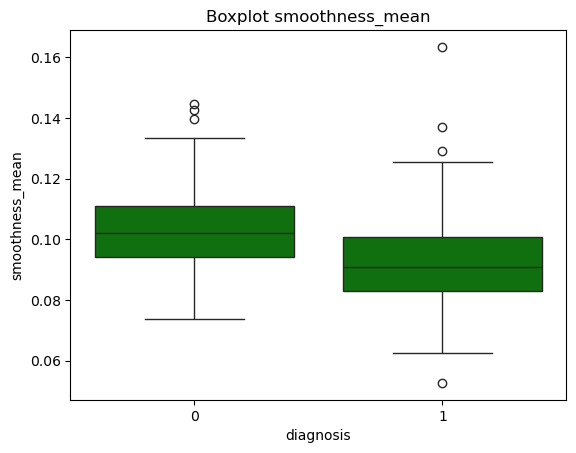

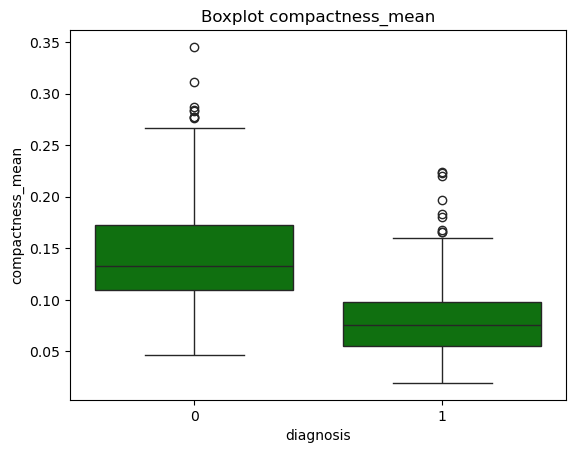

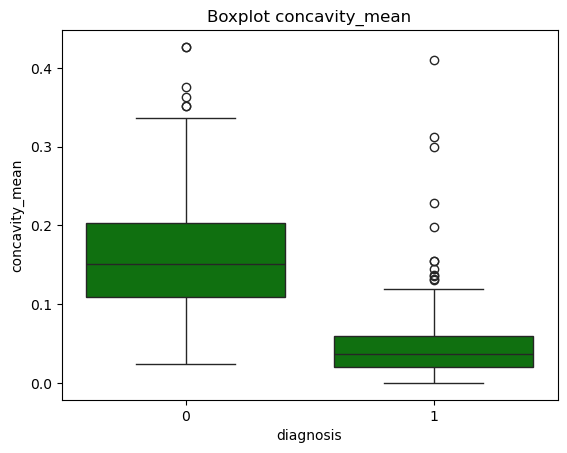

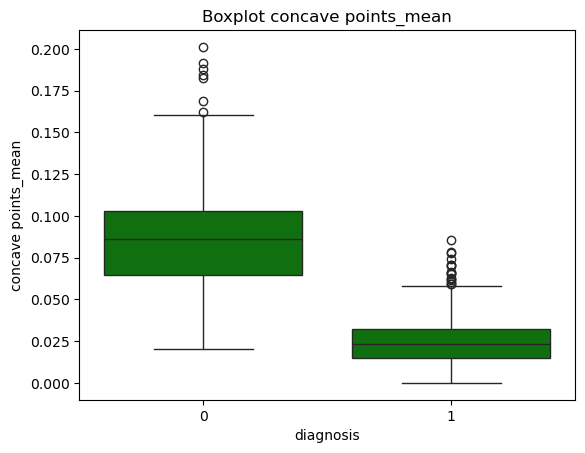

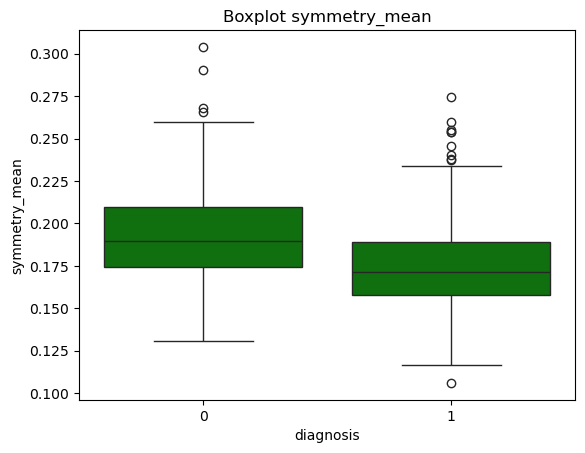

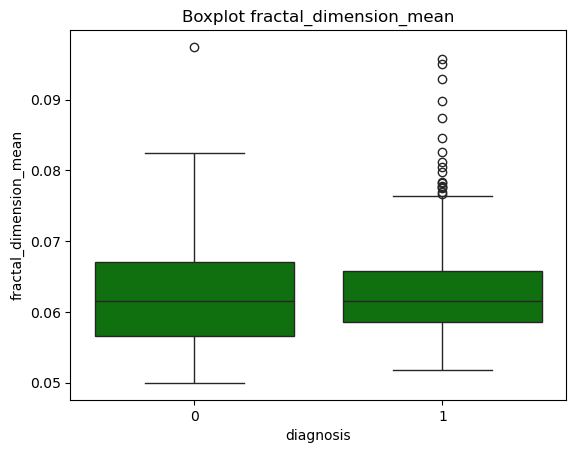

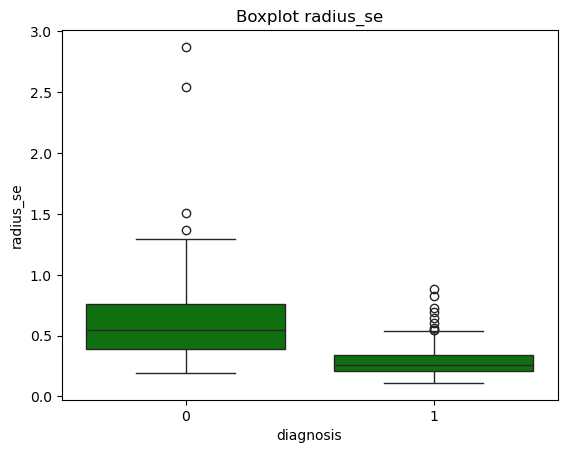

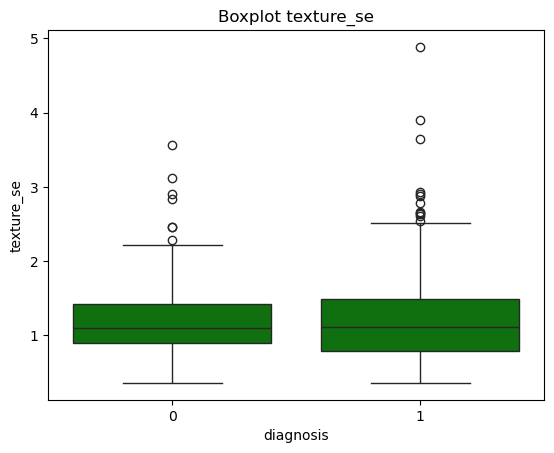

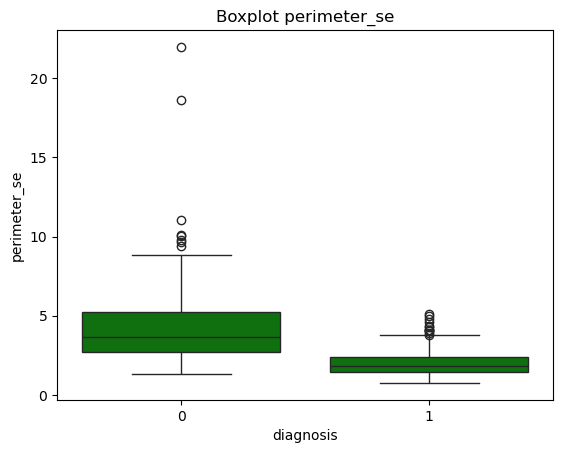

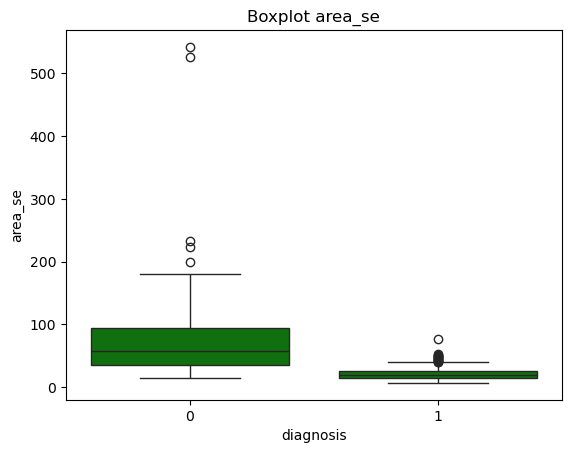

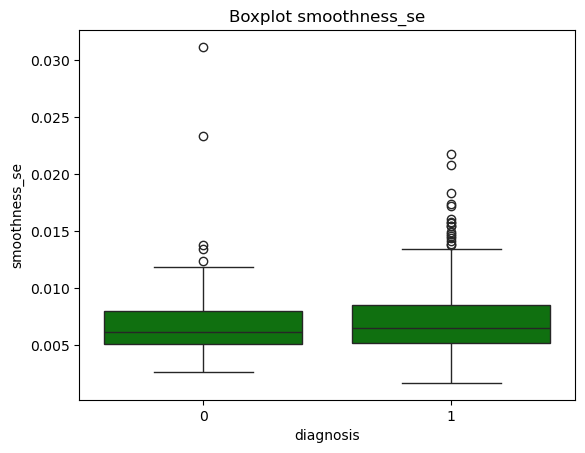

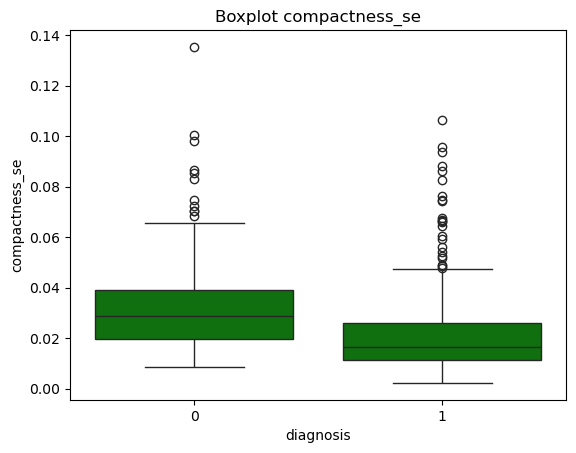

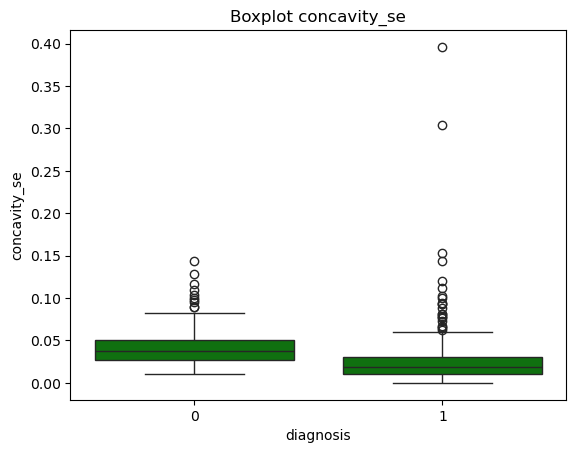

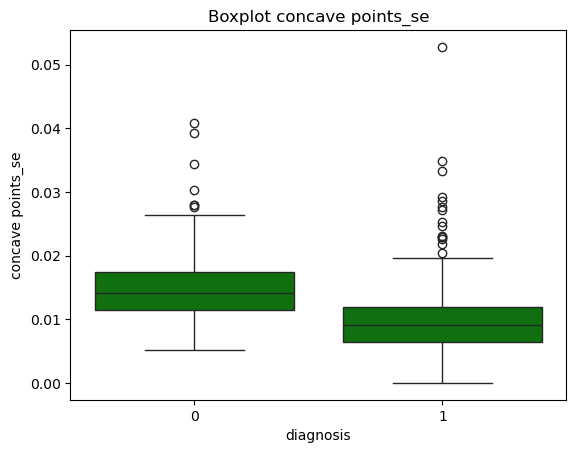

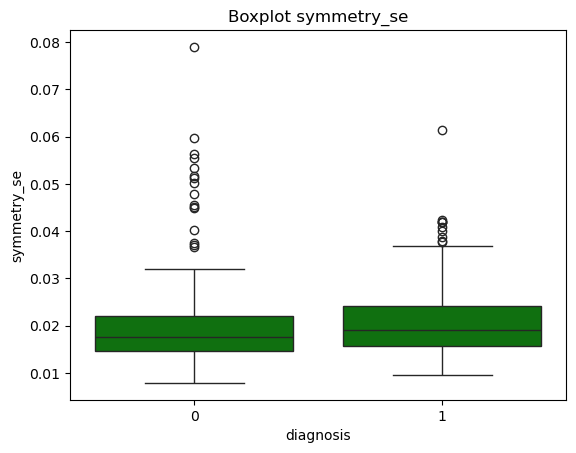

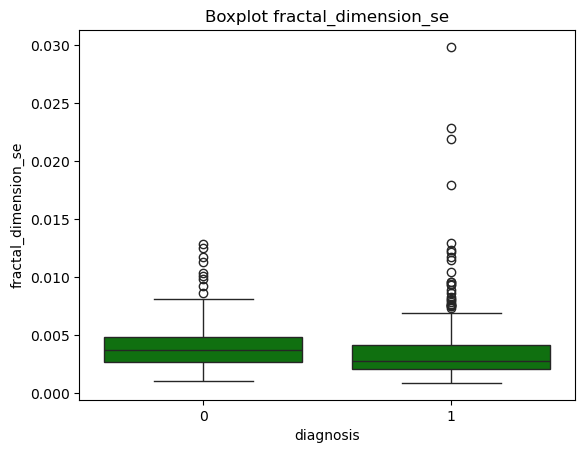

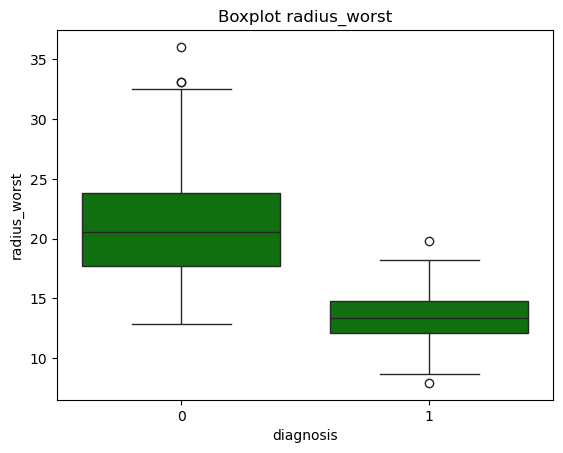

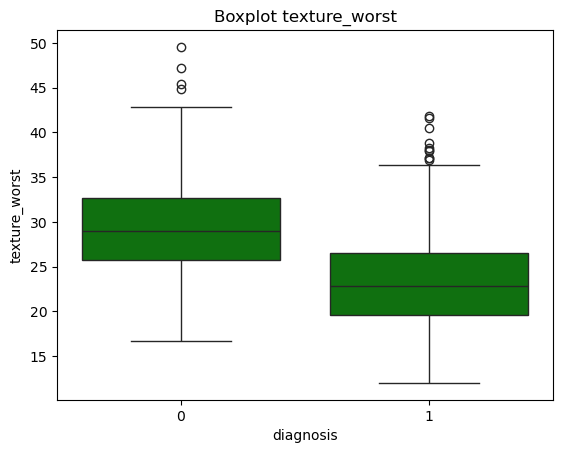

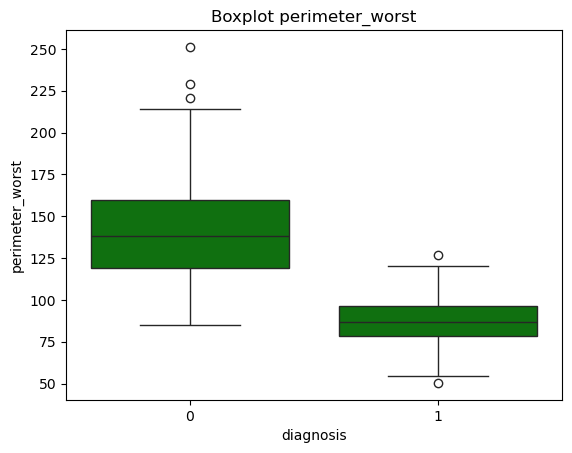

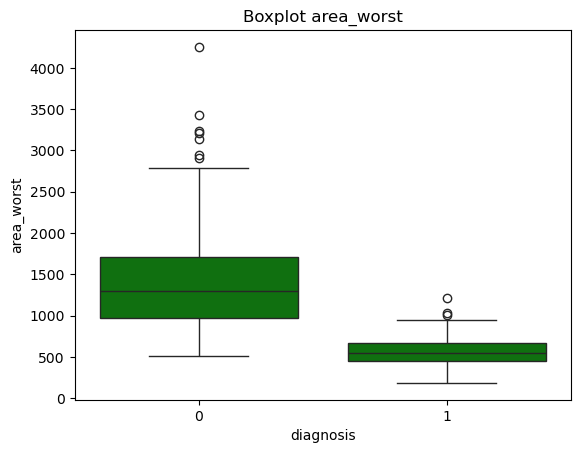

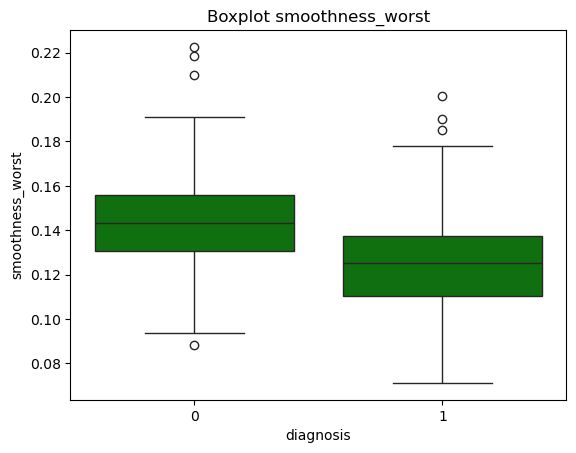

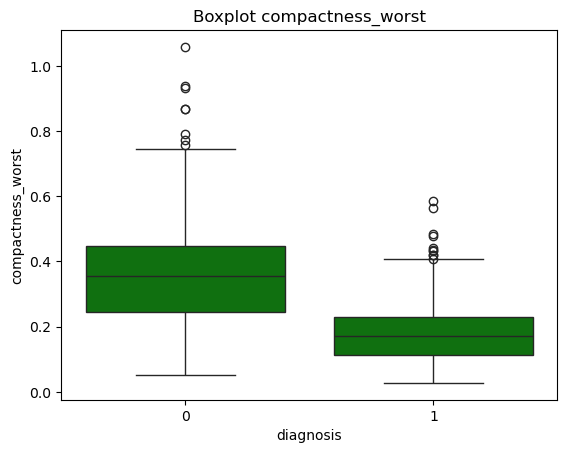

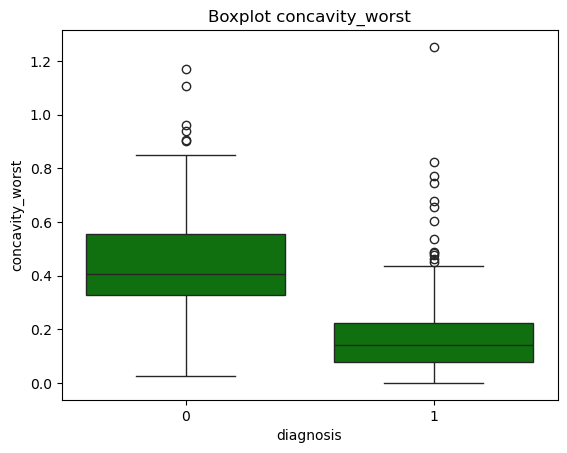

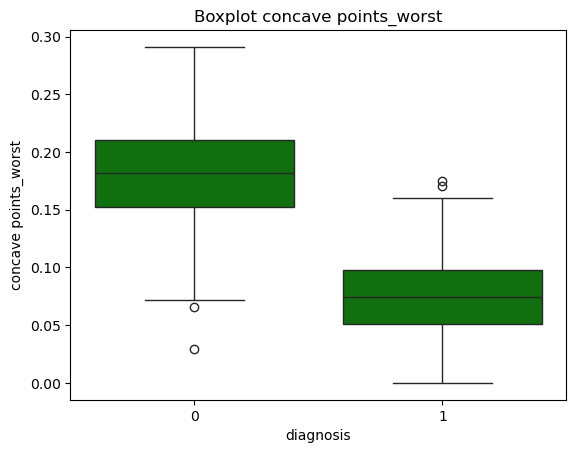

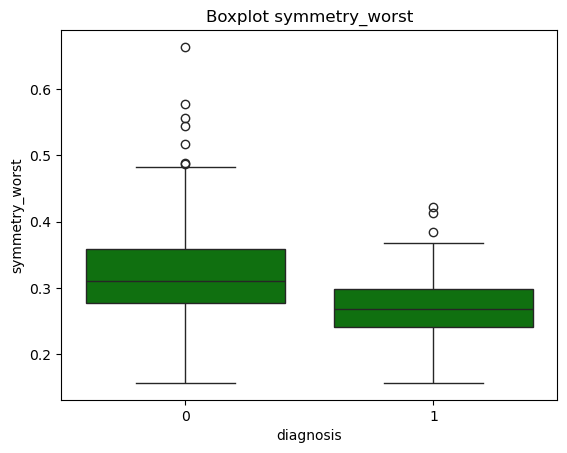

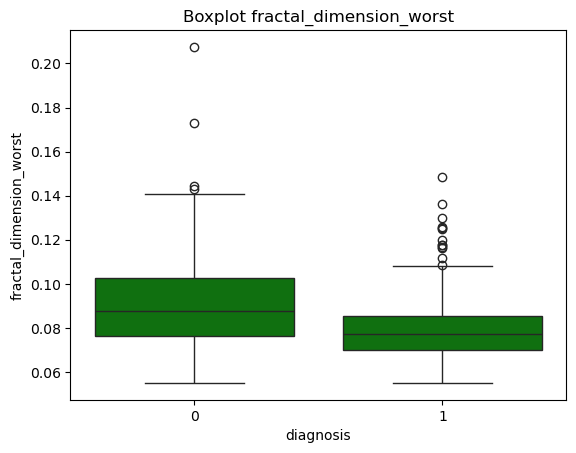

In [17]:
for i , cols in enumerate(numeric_cols):
    sns.boxplot(x='diagnosis',y=df[cols], color='green',data=df)
    plt.title(f'Boxplot {cols}')
    plt.show()

# **Preprocessing**

In [18]:
df.drop(columns=['id','texture_mean','perimeter_mean', 'area_mean',
        'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'smoothness_se',
        'concavity_se', 'symmetry_se','fractal_dimension_se',
        'radius_worst','perimeter_worst','compactness_worst',
        'concave points_worst','fractal_dimension_worst'],inplace=True)

In [19]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop('diagnosis')

In [20]:
print(numeric_cols)

Index(['radius_mean', 'perimeter_se', 'area_se', 'compactness_se',
       'concave points_se', 'texture_worst', 'area_worst', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst'],
      dtype='object')


**Handling Outliers**

In [21]:
df_iqr = df.copy()
outliers_count = {}

for col in numeric_cols:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df_iqr[col] < lower_bound) | (df_iqr[col] > upper_bound)).sum()
    outliers_count[col] = outliers
#this 2 lines from chatgpt wanted to count the outliers in every feature because the dataset only 569
    df_outliers = pd.DataFrame(list(outliers_count.items()), columns=["Feature", "Outliers"])
    df_outliers = df_outliers.sort_values(by="Outliers").reset_index(drop=True)
print("\nOutliers summary:\n", df_outliers)


Outliers summary:
              Feature  Outliers
0      texture_worst         5
1   smoothness_worst         7
2    concavity_worst        12
3        radius_mean        14
4  concave points_se        19
5     symmetry_worst        23
6     compactness_se        28
7         area_worst        35
8       perimeter_se        38
9            area_se        65


In [22]:
for col, count in outliers_count.items():
    if count >= 20:
        Q1 = df_iqr[col].quantile(0.25)
        Q3 = df_iqr[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_iqr.loc[df_iqr[col] < lower_bound, col] = lower_bound
        df_iqr.loc[df_iqr[col] > upper_bound, col] = upper_bound
print("\nShape before:", df.shape)
print("Shape after:", df_iqr.shape)


Shape before: (569, 11)
Shape after: (569, 11)


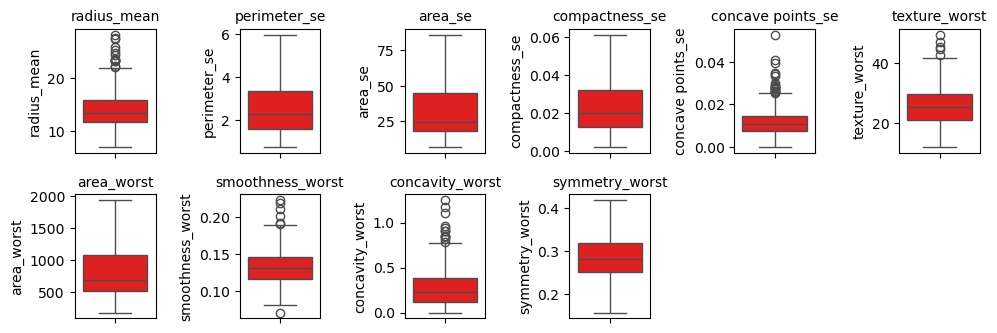

In [23]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(6,6, i)
    sns.boxplot(y=df_iqr[col], color="red")
    plt.title(f'{col}', fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
df.duplicated().sum()

0

# **Train and Modeling**

In [25]:
x = df_iqr.drop(columns=['diagnosis'])
y = df_iqr['diagnosis']
print(x.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

   radius_mean  perimeter_se  area_se  compactness_se  concave points_se  \
0        17.99        5.9835    86.20        0.049040            0.01587   
1        20.57        3.3980    74.08        0.013080            0.01340   
2        19.69        4.5850    86.20        0.040060            0.02058   
3        11.42        3.4450    27.23        0.061505            0.01867   
4        20.29        5.4380    86.20        0.024610            0.01885   

   texture_worst  area_worst  smoothness_worst  concavity_worst  \
0          17.33     1937.05            0.1622           0.7119   
1          23.41     1937.05            0.1238           0.2416   
2          25.53     1709.00            0.1444           0.4504   
3          26.50      567.70            0.2098           0.6869   
4          16.67     1575.00            0.1374           0.4000   

   symmetry_worst  
0         0.41915  
1         0.27500  
2         0.36130  
3         0.41915  
4         0.23640  


**Scaler**

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Logistc Regression**

In [27]:
logistc_model = LogisticRegression(class_weight='balanced',max_iter=500, random_state=42)
logistc_model.fit(x_train_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=500, random_state=42)

In [28]:
y_pred_lr = logistc_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_lr)
conf_matrix = confusion_matrix(y_test, y_pred_lr)
class_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.99

Confusion Matrix:
[[42  1]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



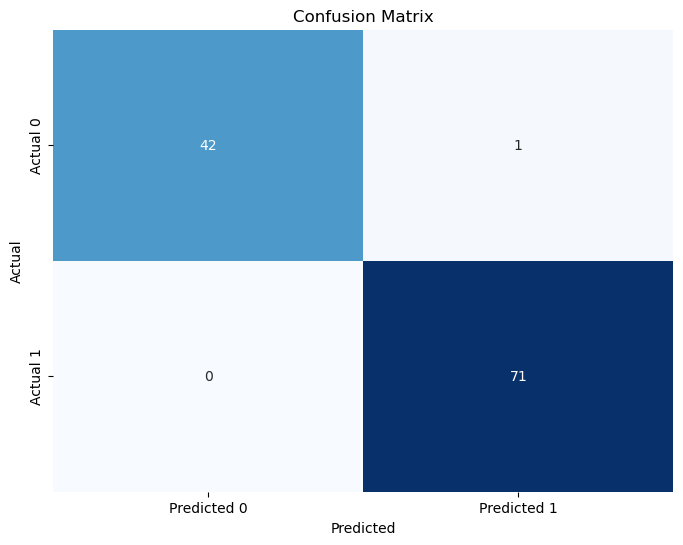

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Naive Bayes**

In [30]:
naive_model = GaussianNB()
naive_model.fit(x_train_scaled, y_train)

GaussianNB()

In [31]:
y_pred_nb = naive_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_nb)
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.97

Confusion Matrix:
[[40  3]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



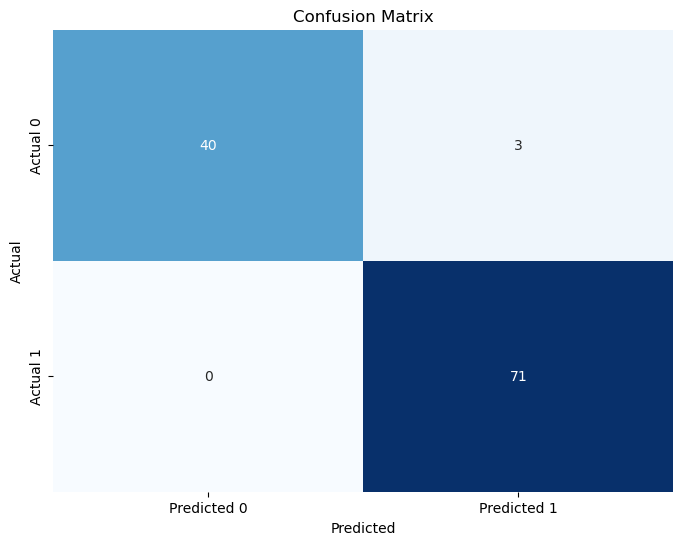

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **KNN**

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_scaled,y_train)
y_pred_knn = knn_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.965

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(x_train_scaled,y_train)
y_pred_knn = knn_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.956

Confusion Matrix:
[[40  3]
 [ 2 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [35]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled,y_train)
y_pred_knn = knn_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.956

Confusion Matrix:
[[40  3]
 [ 2 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# **SVM**

In [36]:
from sklearn.svm import SVC

svc_model =SVC(class_weight='balanced')
svc_model.fit(x_train_scaled,y_train)
y_pred_svc=svc_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.96

Confusion Matrix:
[[41  2]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



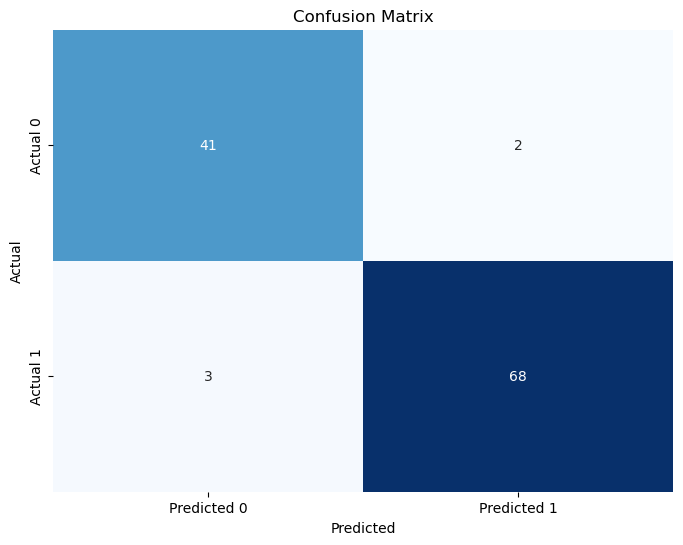

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(class_weight='balanced',max_depth=5,random_state=42)
dt_model.fit(x_train_scaled,y_train)
y_pred_dt = dt_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.98

Confusion Matrix:
[[42  1]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=60,random_state=42)
rf_model.fit(x_train_scaled,y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_rf)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.99

Confusion Matrix:
[[42  1]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



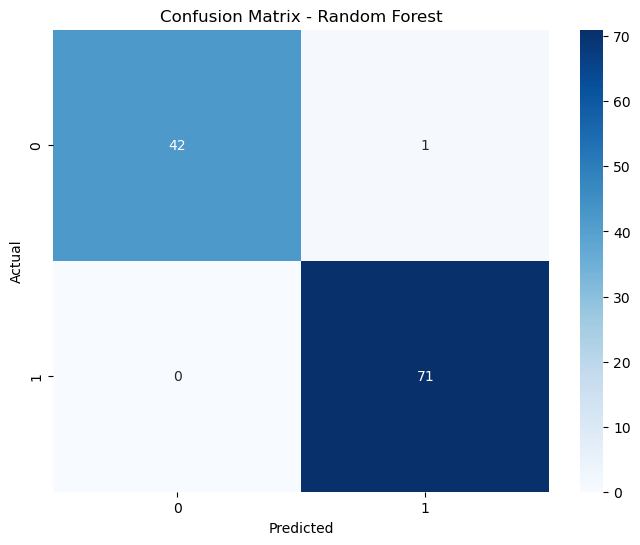

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [41]:
for n in [50,60, 200, 250]:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(x_train_scaled, y_train)
    acc = accuracy_score(y_test, clf.predict(x_test_scaled))
    print(f"n_estimators = {n} → Accuracy = {acc:.4f}")

n_estimators = 50 → Accuracy = 0.9825
n_estimators = 60 → Accuracy = 0.9825
n_estimators = 200 → Accuracy = 0.9825
n_estimators = 250 → Accuracy = 0.9825


# **AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=30, random_state=42)
ada_model.fit(x_train_scaled, y_train)
y_pred_ada = ada_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred_ada)
conf_matrix = confusion_matrix(y_test, y_pred_ada)
class_report = classification_report(y_test, y_pred_ada)
print(f"Accuracy: {accuracy:.3f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.982

Confusion Matrix:
[[41  2]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



c:\Users\Dofy\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


# **Small Compare**

In [58]:
models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(class_weight='balanced',n_estimators=60,random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5,random_state=42),
    "Logistic Regression": LogisticRegression(class_weight='balanced',max_iter=500, random_state=42),
    "SVM": SVC(class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
models_accuracy = {}
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    models_accuracy[name] = acc

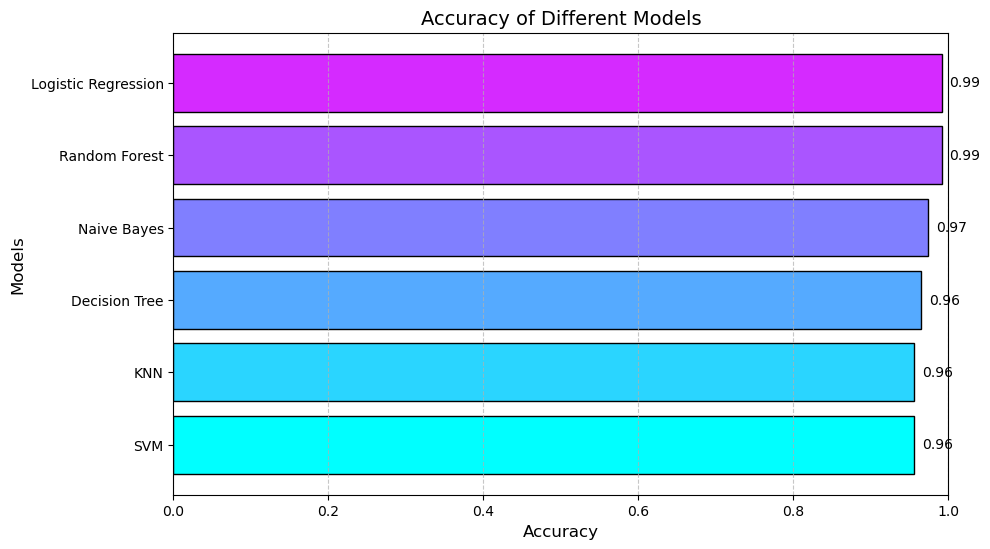

In [59]:
models_sorted = dict(sorted(models_accuracy.items(), key=lambda x: x[1]))
models = list(models_sorted.keys())
accuracy = list(models_sorted.values())
colors = plt.cm.cool([i/len(models) for i in range(len(models))])
plt.figure(figsize=(10,6))
plt.barh(models, accuracy, color=colors, edgecolor='black')
plt.title("Accuracy of Different Models", fontsize=14)
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Models", fontsize=12)
plt.xlim(0,1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracy):
    plt.text(acc + 0.01, i, f"{acc:.2f}", va='center')

plt.show()

**After Using Logistc Regression/KNN/Naive Bayes/SVM/Decision Tree/Random Forst models**

**I found out that Logistc Reggresion(with handling the outliers with iqr) and Random forest has the highest Accuracy : 0.99 with a recall diffrence = 0.02**

# **Deployment**

In [55]:
feature_order = x.columns.tolist()
feature_order

['radius_mean',
 'perimeter_se',
 'area_se',
 'compactness_se',
 'concave points_se',
 'texture_worst',
 'area_worst',
 'smoothness_worst',
 'concavity_worst',
 'symmetry_worst']

In [56]:
# Saving the trained model
import pickle
with open('BreastCancer_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

In [57]:
#Saving the Preprocessing
import pickle
with open('model_preprocessing.pkl', 'wb') as f:
    pickle.dump({
        'scaler':scaler,
        'feature_order' :feature_order
    },f)